In [15]:
# ! pip install adtk
# ! pip install seaborn

In [17]:
import pandas as pd
from adtk.data import validate_series
from adtk.visualization import plot
import seaborn as sns

https://adtk.readthedocs.io/en/stable/notebooks/demo.html

In [57]:
def visualize(s, anomalies):
    """
    Visualize the time series and the detected anomalies.
    This method is defined because the plot method in adtk is not working due to
    the issue in the adtk library (dependency on old version of seaborn) which is no longer maintained.

    https://stackoverflow.com/questions/78019854/matplotlib-seaborn-whitegrid-is-not-a-valid-package-style
    """

    plt.figure(figsize=(7, 3))
    ax = plt.gca()
    anomalies.astype(int).plot(ax = ax, c = 'red', alpha = 0.5, linestyle = '--')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(["normal", "anomaly"])
    
    ax = ax.twinx()
    s.plot(ax = ax, alpha = 0.8)
    

# Univariate

In [9]:
s = pd.read_csv('./data/temperature.csv', index_col="Time", parse_dates=True)
s = validate_series(s)
s

,Temperature (C)
Time,
2017-05-02 00:00:00,18.91
2017-05-02 01:00:00,19.91
2017-05-02 02:00:00,20.19
2017-05-02 03:00:00,18.69
2017-05-02 04:00:00,18.11
...,...
2017-05-10 03:00:00,21.70
2017-05-10 04:00:00,21.43
2017-05-10 05:00:00,21.32


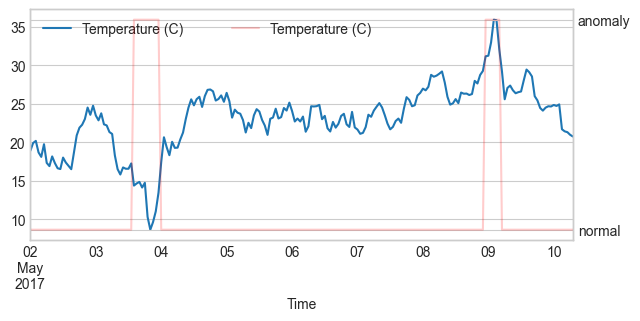

In [47]:
from adtk.detector import ThresholdAD
threshold_ad = ThresholdAD(high=30, low=15)
anomalies = threshold_ad.detect(s)

visualize(s, anomalies)

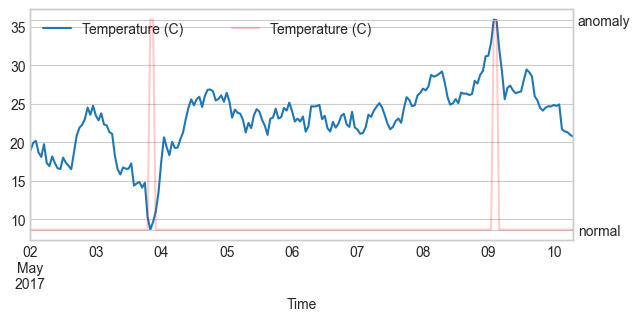

In [48]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(s)
visualize(s, anomalies)

# Multivariate

In [50]:

df = pd.read_csv('./data/generator.csv', index_col="Time", parse_dates=True)
df = validate_series(df)
df

,Speed (kRPM),Power (kW)
Time,,
2017-05-02 17:08:37,6.066579,10.308257
2017-05-02 18:08:37,6.035764,9.186763
2017-05-02 19:08:37,5.922730,10.128382
2017-05-02 20:08:37,5.999581,10.290300
2017-05-02 21:08:37,6.031067,8.910037
...,...,...
2017-05-19 04:08:37,6.040213,9.531571
2017-05-19 05:08:37,5.948470,9.959600
2017-05-19 06:08:37,5.932115,10.144819


In [51]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=3))
anomalies = min_cluster_detector.fit_detect(df)

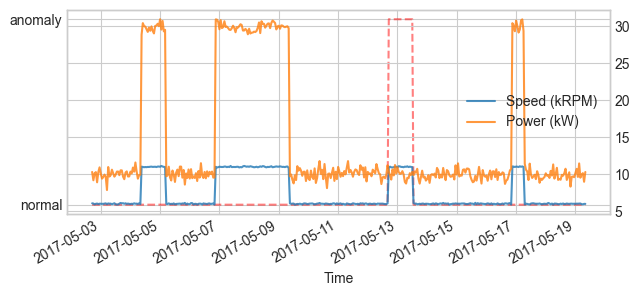

In [58]:
visualize(df, anomalies)

In [59]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies = outlier_detector.fit_detect(df)

c:\Users\madalina.ciortan\AppData\Local\miniconda3\envs\europython\lib\site-packages\adtk\detector\_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False Fa

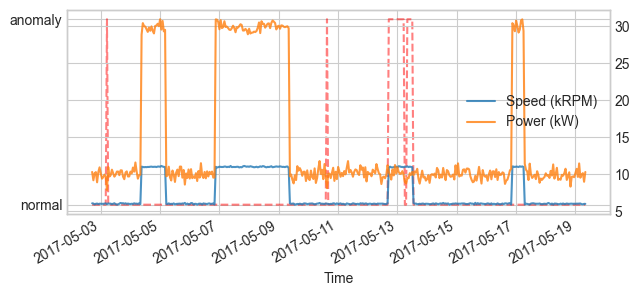

In [60]:
visualize(df, anomalies)

In [61]:
from adtk.detector import PcaAD
pca_ad = PcaAD(k=1)
anomalies = pca_ad.fit_detect(df)

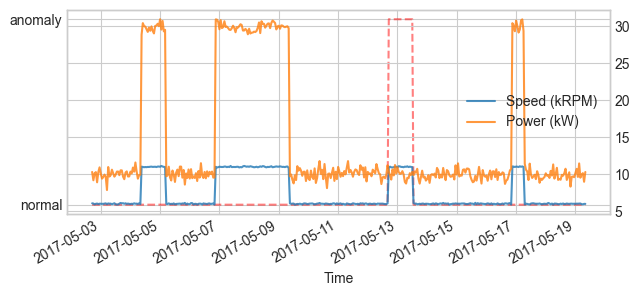

In [62]:
visualize(df, anomalies)